In this project we will analyse a sample of data from Megaline, a telecommunications company.

This company offers two pre-paid plans, Surf and Ultimate.

Throughout this work we will carry out some analysis processes to verify which plan offers a higher volume of revenue for Megaline.

# 1. Initiation

In [2]:
#Loading all the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as  np
from scipy import stats as st
import seaborn as sns


# 1.1 Loading and exploring the data

In this topic we will load the 5 available tables, check the types of data, if a formatting in the data will be necessary and if there are missing values.

In [3]:
df1 = pd.read_csv('/Users/andrewferreira/Downloads/megaline_calls.csv')
df2 = pd.read_csv('/Users/andrewferreira/Downloads/megaline_internet.csv')
df3 = pd.read_csv('/Users/andrewferreira/Downloads/megaline_messages.csv')
df4 = pd.read_csv('/Users/andrewferreira/Downloads/megaline_plans.csv')
df5 = pd.read_csv('/Users/andrewferreira/Downloads/megaline_users.csv')

I will print a sample of each of the tables and check some of it information.

In [4]:
df1.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [5]:
df1['duration'].value_counts()

0.00     26834
4.02       102
8.37       102
3.91       101
4.30       100
         ...  
31.55        1
24.95        1
26.23        1
29.56        1
25.18        1
Name: duration, Length: 2802, dtype: int64

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [7]:
df2.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [9]:
df3.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [11]:
df4.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [12]:
df5.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [13]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


After loading all the tables we verify that there are some null values in the df1 table. After making an investigation into why there are so many cases for this amount, I came to the conclusion that they can only be missed calls, which the match will not affect our study.

We also verified that there are missing values in the churn_date column of the df5 table.

Finally, there are some columns of dates when a change in the type of data will be necessary for future studies.

# 1.2 Taking care of the missing values

In [14]:
df1.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [15]:
df2.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [16]:
df3.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [17]:
df4.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [18]:
df5.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [19]:
df5['churn_date'].unique()

array([nan, '2018-12-18', '2018-11-16', '2018-09-07', '2018-12-30',
       '2018-10-07', '2018-12-31', '2018-11-24', '2018-11-11',
       '2018-12-12', '2018-11-14', '2018-12-27', '2018-11-29',
       '2018-12-22', '2018-11-30', '2018-10-13', '2018-07-31',
       '2018-12-15', '2018-12-19', '2018-10-03', '2018-10-22',
       '2018-08-16', '2018-12-26', '2018-09-01', '2018-11-21',
       '2018-08-19', '2018-12-10', '2018-09-17', '2018-11-18',
       '2018-09-18'], dtype=object)

As we mentioned in the previous topic, there are values absent in the df5 table relating to the term of a client's contract. I will not replace these values because these cells are with absent values means that the contract continues in force.

# 1.3 Correction of the data type

Next, I will replace the type of data for date in some of the tables that contain date information, in order to facilitate our study of each customer's expenses in each month of the year.

In [20]:
df1['call_date'] = pd.to_datetime(df1['call_date'], format='%Y-%m-%d')

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [22]:
df2['session_date'] = pd.to_datetime(df2['session_date'], format='%Y-%m-%d')

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [24]:
df3['message_date'] = pd.to_datetime(df3['message_date'], format='%Y-%m-%d')

In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


# 1.4 Enriching the data

After a change in the data type in some columns, it is now followed by the creation of a column relative to the month in each of the tables that underwent the change of the data type. Another of the points to take into account should Megaline round any second that is in a call for minute then, I will round off the duration of the calls in table df1.

In [26]:
df1['month'] = df1['call_date'].dt.month

In [27]:
df1.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [28]:
df1['duration'] = df1['duration'].round()

In [29]:
df2['month'] = df2['session_date'].dt.month

In [30]:
df2.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [31]:
df3['month'] = df3['message_date'].dt.month

In [32]:
df3.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


After an initial analysis, I came to the conclusion that there were some types of data that deserved a change, I also decided to create a column referring to the month that will allow me to do some studies later.

# 2. Creating dynamic tables and merging tables

Our data file consists of 5 tables that complement each other. In order to facilitate our analysis, I will create dynamic tables with important and related information to make a merge between them at the end.

I will create the following dynamic tables:

- That calculates the duration of calls made by each user in each month
- Which calculates the number of calls made by each user in each month
- That calculates the internet volume used by each user in each month

As Megaline rounds up MB in GB, I will add a column to our pivot table of internet values in GB.

Finally I will do a filtering of the df5 table with some data that I think is relevant to our final table.

It should be noted that I will only rename the columns after merging.

In [33]:
dur_calls = df1.pivot_table(index=['user_id', 'month'], values= 'duration', aggfunc='sum')
dur_calls = dur_calls.reset_index()

In [34]:
dur_calls.head(10)

,user_id,month,duration
0,1000,12,117.0
1,1001,8,173.0
2,1001,9,297.0
3,1001,10,374.0
4,1001,11,404.0
5,1001,12,394.0
6,1002,10,53.0
7,1002,11,359.0
8,1002,12,362.0
9,1003,12,1040.0


In [35]:
sum_calls = df1.pivot_table(index=['user_id', 'month'], values= 'duration', aggfunc='count')
sum_calls = sum_calls.reset_index()
sum_calls.head(10)

,user_id,month,duration
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
5,1001,12,56
6,1002,10,11
7,1002,11,55
8,1002,12,47
9,1003,12,149


In [36]:
sum_data = df2.pivot_table(index=['user_id', 'month'], values= 'mb_used', aggfunc='sum')
sum_data = sum_data.reset_index()
sum_data.head(10)

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
5,1001,12,19369.18
6,1002,10,6552.01
7,1002,11,19345.08
8,1002,12,14396.24
9,1003,12,27044.14


In [37]:
#criando uma coluna com valores arredondados de gbytes
sum_data['gb'] = (sum_data['mb_used'] / 1024).round()

In [38]:
sum_data.head(10)

,user_id,month,mb_used,gb
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,13.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,18.0
5,1001,12,19369.18,19.0
6,1002,10,6552.01,6.0
7,1002,11,19345.08,19.0
8,1002,12,14396.24,14.0
9,1003,12,27044.14,26.0


In [39]:
sum_messages = df3.pivot_table(index=['user_id', 'month'], values= 'message_date', aggfunc='count')
sum_messages = sum_messages.reset_index()
sum_messages.head(10)


,user_id,month,message_date
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
5,1001,12,44
6,1002,10,15
7,1002,11,32
8,1002,12,41
9,1003,12,50


In [40]:
plans = df5[['user_id', 'plan', 'city']]

In [41]:
plans.head(10)

,user_id,plan,city
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,surf,"Tulsa, OK MSA"
4,1004,surf,"Seattle-Tacoma-Bellevue, WA MSA"
5,1005,surf,"Dallas-Fort Worth-Arlington, TX MSA"
6,1006,ultimate,"San Francisco-Oakland-Berkeley, CA MSA"
7,1007,surf,"Grand Rapids-Kentwood, MI MSA"
8,1008,ultimate,"Orlando-Kissimmee-Sanford, FL MSA"
9,1009,surf,"San Jose-Sunnyvale-Santa Clara, CA MSA"


In [42]:
#Merging our pivot_table and data slices
merge1 = dur_calls.merge(sum_calls, on=['user_id', 'month'], how='outer')
merge2 = merge1.merge(sum_messages, on=['user_id', 'month'], how='outer')
merge3 = merge2.merge(sum_data, on=['user_id', 'month'], how='outer')
table = merge3.merge(plans, on=['user_id'], how='outer')


In [43]:
table.head(10)

,user_id,month,duration_x,duration_y,message_date,mb_used,gb,plan,city
0,1000,12.0,117.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,173.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,297.0,49.0,44.0,13314.82,13.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,374.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,404.0,64.0,36.0,18504.30,18.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
5,1001,12.0,394.0,56.0,44.0,19369.18,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
6,1002,10.0,53.0,11.0,15.0,6552.01,6.0,surf,"Las Vegas-Henderson-Paradise, NV MSA"
7,1002,11.0,359.0,55.0,32.0,19345.08,19.0,surf,"Las Vegas-Henderson-Paradise, NV MSA"
8,1002,12.0,362.0,47.0,41.0,14396.24,14.0,surf,"Las Vegas-Henderson-Paradise, NV MSA"
9,1003,12.0,1040.0,149.0,50.0,27044.14,26.0,surf,"Tulsa, OK MSA"


In [44]:
#renaming columns
table.columns = ['user_id', 'month','call_duration', 'total_calls', 'total_text', 'mb_used', 'rounded_gb', 'plan', 'city']

In [45]:
table.head(10)

,user_id,month,call_duration,total_calls,total_text,mb_used,rounded_gb,plan,city
0,1000,12.0,117.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,173.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,297.0,49.0,44.0,13314.82,13.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,374.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,404.0,64.0,36.0,18504.30,18.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
5,1001,12.0,394.0,56.0,44.0,19369.18,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
6,1002,10.0,53.0,11.0,15.0,6552.01,6.0,surf,"Las Vegas-Henderson-Paradise, NV MSA"
7,1002,11.0,359.0,55.0,32.0,19345.08,19.0,surf,"Las Vegas-Henderson-Paradise, NV MSA"
8,1002,12.0,362.0,47.0,41.0,14396.24,14.0,surf,"Las Vegas-Henderson-Paradise, NV MSA"
9,1003,12.0,1040.0,149.0,50.0,27044.14,26.0,surf,"Tulsa, OK MSA"


This final table will allow our study to be more simplified, we have all the information we need for the next topics.

As we wanted to keep all the information from our tables after joining, we then opted for outer merging.

# 3. Customer behaviour analysis

In this chapter we will describe the behaviour of customers and the monthly revenue for each user.

First of all, let's calculate the monthly revenue for each user. For this we will subtract the free ceiling of each package from the total number of calls, text messages and internet through functions. We will also create additional columns to our table about each of the functions created.

In a second part we will calculate means, medians, maxims and variances.

In [46]:
#Describing the two plans
surf_monthly_price = 20
surf_monthly_minutes = 500
surf_monthly_text = 50
surf_monthly_data = 15
surf_call_price = 0.03
surf_text_price = 0.03
surf_data_price = 10

ultimate_monthly_price = 70
ultimate_monthly_minutes = 3000
ultimate_monthly_text = 1000
ultimate_monthly_data = 30
ultimate_call_price = 0.01
ultimate_text_price = 0.01
ultimate_data_price = 7

            

In [47]:
#Creating function to check the excess call duration of each user
def extra_calls(row):
    plan = row['plan']
    minutes = row['call_duration']
    
    if plan == 'surf':
        if minutes > 500:
            charge = minutes - 500
        else:
            charge = 0
    if plan == 'ultimate':
        if minutes > 3000:
            charge = minutes - 3000
        else:
            charge = 0
    return charge
        

In [48]:
#Checking if function is working
extra_calls(table.iloc[25])

76.0

In [49]:
#adding an extra column in our table
table['extra_calls'] = table.apply(extra_calls, axis=1)

In [50]:
table.head(10)

,user_id,month,call_duration,total_calls,total_text,mb_used,rounded_gb,plan,city,extra_calls
0,1000,12.0,117.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0
1,1001,8.0,173.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
2,1001,9.0,297.0,49.0,44.0,13314.82,13.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
3,1001,10.0,374.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
4,1001,11.0,404.0,64.0,36.0,18504.30,18.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
5,1001,12.0,394.0,56.0,44.0,19369.18,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
6,1002,10.0,53.0,11.0,15.0,6552.01,6.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",0.0
7,1002,11.0,359.0,55.0,32.0,19345.08,19.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",0.0
8,1002,12.0,362.0,47.0,41.0,14396.24,14.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",0.0
9,1003,12.0,1040.0,149.0,50.0,27044.14,26.0,surf,"Tulsa, OK MSA",540.0


In [51]:
#Creating a function to check the excess of text messages of each user
def extra_texts(row):
    plan = row['plan']
    text = row['total_text']
    
    if plan == 'surf':
        if text > 50:
            charge = text - 50
        else:
            charge = 0
    if plan == 'ultimate':
        if text > 1000:
            charge = text - 1000
        else:
            charge = 0
    return charge

In [52]:
#Checking if it's working
extra_texts(table.iloc[3])

3.0

In [53]:
#adding an extra column in our table
table['extra_text'] = table.apply(extra_texts, axis=1)

In [54]:
table.head(10)
         

,user_id,month,call_duration,total_calls,total_text,mb_used,rounded_gb,plan,city,extra_calls,extra_text
0,1000,12.0,117.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0
1,1001,8.0,173.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0
2,1001,9.0,297.0,49.0,44.0,13314.82,13.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0
3,1001,10.0,374.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,3.0
4,1001,11.0,404.0,64.0,36.0,18504.30,18.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0
5,1001,12.0,394.0,56.0,44.0,19369.18,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0
6,1002,10.0,53.0,11.0,15.0,6552.01,6.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",0.0,0.0
7,1002,11.0,359.0,55.0,32.0,19345.08,19.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",0.0,0.0
8,1002,12.0,362.0,47.0,41.0,14396.24,14.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",0.0,0.0
9,1003,12.0,1040.0,149.0,50.0,27044.14,26.0,surf,"Tulsa, OK MSA",540.0,0.0


In [55]:
#Creating function to check the excess of each user's internet ceiling
def extra_data(row):
    plan = row['plan']
    data = row['rounded_gb']
    
    if plan == 'surf':
        if data > 15:
            charge = data - 15
        else:
            charge = 0
    if plan == 'ultimate':
        if data > 30:
            charge = data - 30
        else:
            charge = 0
    return charge

In [56]:
#checking if it's working
extra_data(table.iloc[3])

7.0

In [57]:
#adding an extra column in our table
table['extra_data'] = table.apply(extra_data, axis=1)

In [58]:
table.head(10)

,user_id,month,call_duration,total_calls,total_text,mb_used,rounded_gb,plan,city,extra_calls,extra_text,extra_data
0,1000,12.0,117.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0
1,1001,8.0,173.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0
2,1001,9.0,297.0,49.0,44.0,13314.82,13.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0
3,1001,10.0,374.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,3.0,7.0
4,1001,11.0,404.0,64.0,36.0,18504.30,18.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,3.0
5,1001,12.0,394.0,56.0,44.0,19369.18,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,4.0
6,1002,10.0,53.0,11.0,15.0,6552.01,6.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",0.0,0.0,0.0
7,1002,11.0,359.0,55.0,32.0,19345.08,19.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",0.0,0.0,4.0
8,1002,12.0,362.0,47.0,41.0,14396.24,14.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",0.0,0.0,0.0
9,1003,12.0,1040.0,149.0,50.0,27044.14,26.0,surf,"Tulsa, OK MSA",540.0,0.0,11.0


In [59]:
#Creating a function that calculates how much each user will have to pay monthly

def month_pay(row):
    plan = row['plan']
    extra_calls = row['extra_calls']
    extra_text = row['extra_text']
    extra_data = row['extra_data']
    
    if plan == 'surf':
        pay = surf_monthly_price + ((extra_calls * surf_call_price ) + (extra_text * surf_text_price ) + ( extra_data * surf_data_price))
    else:
        pay = ultimate_monthly_price + ((extra_calls * ultimate_call_price ) + (extra_text * ultimate_text_price ) + ( extra_data * ultimate_data_price))
    return pay
        

In [60]:
#adding an extra column in our table
table['monthly_pay'] = table.apply(month_pay, axis=1)

In [61]:
table.head(25)

,user_id,month,call_duration,total_calls,total_text,mb_used,rounded_gb,plan,city,extra_calls,extra_text,extra_data,monthly_pay
0,1000,12.0,117.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0,70.00
1,1001,8.0,173.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,20.00
2,1001,9.0,297.0,49.0,44.0,13314.82,13.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,20.00
3,1001,10.0,374.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,3.0,7.0,90.09
4,1001,11.0,404.0,64.0,36.0,18504.30,18.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,3.0,50.00
5,1001,12.0,394.0,56.0,44.0,19369.18,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,4.0,60.00
6,1002,10.0,53.0,11.0,15.0,6552.01,6.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",0.0,0.0,0.0,20.00
7,1002,11.0,359.0,55.0,32.0,19345.08,19.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",0.0,0.0,4.0,60.00
8,1002,12.0,362.0,47.0,41.0,14396.24,14.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",0.0,0.0,0.0,20.00
9,1003,12.0,1040.0,149.0,50.0,27044.14,26.0,surf,"Tulsa, OK MSA",540.0,0.0,11.0,146.20


Through the price description of each of the plans we can get what each user spent in excess.

For this we created functions that subtract the flow that each user had in relation to their plan.

Next we will check the maximums, means, medians, variances and standard deviation of each plan in relation to the duration of calls, number of messages and internet used.

# Calculation for call duration

In [62]:
table.query('plan == "surf"')['call_duration'].max()

1433.0

In [63]:
table.query('plan == "surf"')['call_duration'].mean()

411.9747572815534

In [64]:
table.query('plan == "surf"')['call_duration'].median()

406.0

In [65]:
table.query('plan == "ultimate"')['call_duration'].max()

1297.0

In [66]:
table.query('plan == "ultimate"')['call_duration'].mean()

410.1037868162693

In [67]:
table.query('plan == "ultimate"')['call_duration'].median()

401.0

In [68]:
np.var(table.query('plan == "surf"')['call_duration'])

46918.67703270805

In [69]:
np.std(table.query('plan == "surf"')['call_duration'])

216.60719524685243

In [70]:
np.var(table.query('plan == "ultimate"')['call_duration'])

50395.32162661379

In [71]:
np.std(table.query('plan == "ultimate"')['call_duration'])

224.48902339894883

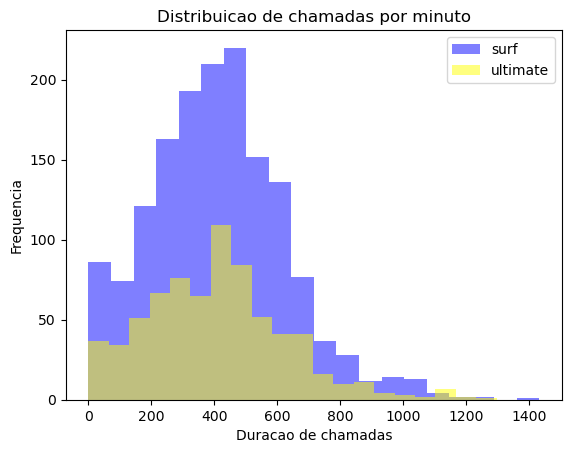

In [72]:
surf_calls = table.query('plan == "surf"')['call_duration']
ultimate_calls = table.query('plan == "ultimate"')['call_duration']

plt.hist(surf_calls, bins=20, alpha=0.5, color='blue', label='surf')
plt.hist(ultimate_calls, bins=20, alpha=0.5, color='yellow', label='ultimate')
plt.xlabel('Duracao de chamadas')
plt.ylabel('Frequencia')
plt.title('Distribuicao de chamadas por minuto')
plt.legend()
plt.show()


Through the histogram we can see that there are many users of the surf plan who exceed their ceiling in call duration while the opposite happens in the ultimate plan where the maximum peak of minutes was 1297 minutes not even coming close to the 3000 minutes available.

We can also verify that the data from both plans have a very approximate standard deviation.

# Calculation for the value of text messages

In [73]:
table.query('plan == "surf"')['total_text'].max()

266.0

In [74]:
table.query('plan == "surf"')['total_text'].mean()

40.10965630114566

In [75]:
table.query('plan == "surf"')['total_text'].median()

32.0

In [76]:
table.query('plan == "ultimate"')['total_text'].max()

166.0

In [77]:
table.query('plan == "ultimate"')['total_text'].mean()

46.29623287671233

In [78]:
table.query('plan == "ultimate"')['total_text'].median()

41.0

In [79]:
np.var(table.query('plan == "surf"')['total_text'])

1090.4511506183703

In [80]:
np.std(table.query('plan == "surf"')['total_text'])

33.02197981070139

In [81]:
np.var(table.query('plan == "ultimate"')['total_text'])

1083.3249173156323

In [82]:
np.std(table.query('plan == "ultimate"')['total_text'])

32.91390158148426

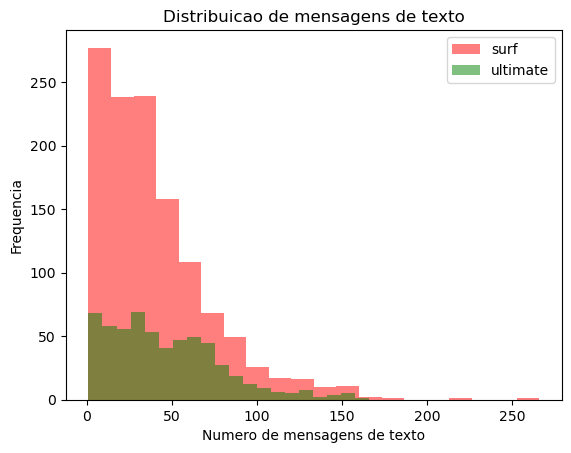

In [83]:
surf_messages = table.query('plan == "surf"')['total_text']
ultimate_messages = table.query('plan == "ultimate"')['total_text']

plt.hist(surf_messages, bins=20, alpha=0.5, color='red', label='surf')
plt.hist(ultimate_messages, bins=20, alpha=0.5, color='green', label='ultimate')
plt.xlabel('Numero de mensagens de texto')
plt.ylabel('Frequencia')
plt.title('Distribuicao de mensagens de texto')
plt.legend()
plt.show()

Regarding to the number of messages, the values of means and standard deviation are quite close. There are some atypical values in the surf plan where the maximum is 266 in a plan where you only have 50 free messages included.

# Calculation for the value of text messages

In [84]:
table.query('plan == "surf"')['rounded_gb'].max()

69.0

In [85]:
table.query('plan == "surf"')['rounded_gb'].mean()

16.320282413350448

In [86]:
table.query('plan == "surf"')['rounded_gb'].median()

17.0

In [87]:
table.query('plan == "ultimate"')['rounded_gb'].max()

46.0

In [88]:
table.query('plan == "ultimate"')['rounded_gb'].mean()

16.830319888734355

In [89]:
table.query('plan == "ultimate"')['rounded_gb'].median()

16.0

In [90]:
np.var(table.query('plan == "surf"')['rounded_gb'])

59.18817655695667

In [91]:
np.std(table.query('plan == "surf"')['rounded_gb'])

7.693385246882978

In [92]:
np.var(table.query('plan == "ultimate"')['rounded_gb'])

58.48024899363789

In [93]:
np.std(table.query('plan == "ultimate"')['rounded_gb'])

7.647237997711192

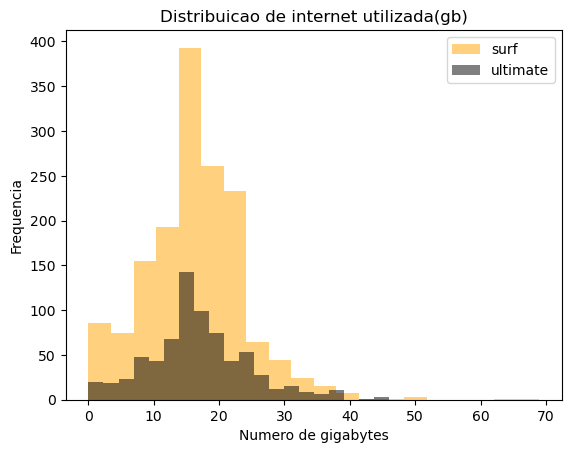

In [94]:
surf_data = table.query('plan == "surf"')['rounded_gb']
ultimate_data = table.query('plan == "ultimate"')['rounded_gb']

plt.hist(surf_data, bins=20, alpha=0.5, color='orange', label='surf')
plt.hist(ultimate_data, bins=20, alpha=0.5, color='black', label='ultimate')
plt.xlabel('Numero de gigabytes')
plt.ylabel('Frequencia')
plt.title('Distribuicao de internet utilizada(gb)')
plt.legend()
plt.show()

It should be noted that the medians in both plans are equal, their averages are also very similar and the number of gb used in both plans are also very similar as well as their standard deviation.

# 4. Hypothesis Test

In this chapter we will test some hypotheses.

First of all, we will test the hypothesis on the average revenue of users of the surf and ultimate plans.

- null hypothesis = The average revenue of users of the surf and ultimate plans are the same.

- alternative hypothesis = The average revenue of users of the surf and ultimate plans are different.

In [95]:
#Testing if the average revenue of the surf and ultimate plans are different
alpha = 0.05
sample_1 = table.query('plan == "surf"')['monthly_pay']
sample_2 = table.query('plan == "ultimate"')['monthly_pay']
results = st.ttest_ind(sample_1, sample_2, equal_var=False)


if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")
    
print('p-value:', results.pvalue)

We reject the null hypothesis
p-value: 6.275445010238927e-26


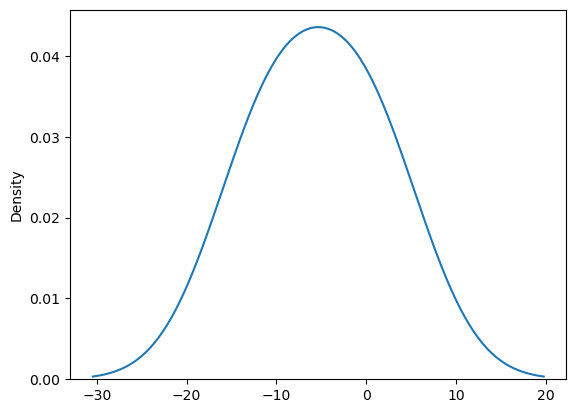

In [96]:
sns.kdeplot(results);

In this exercise we will test the hypothesis on the average revenue of users of NY-NJ and users from other regions.

- null hypothesis = The average revenue of users of NY-NJ and equal to the average revenue of users of other regions

- alternative hypothesis = The average revenue of NY-NJ users and different from the average revenue of users from other regions

In [97]:
#Testing hypothesis for average users of NY-NJ to be different from users of other regions
alpha = 0.05
sample_3 = table[table['city'].str.contains('NY-NJ')]['monthly_pay']
sample_4 = table[~table['city'].str.contains('NY-NJ')]['monthly_pay']
results2 = st.ttest_ind(sample_3, sample_4)


if results.pvalue > alpha:
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")
    
print('p-value:', results2.pvalue)


We cannot reject the null hypothesis
p-value: 0.03047905572405306


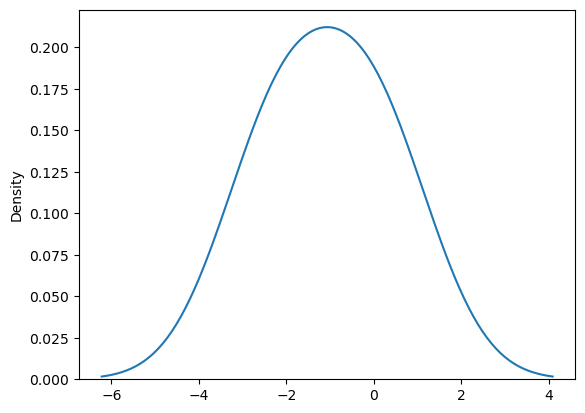

In [98]:
sns.kdeplot(results2);

In both hypotheses we set the level of significance at 5%.

- In the first hypothesis we reject the null hypothesis, assuming that there is no significant difference between the average revenue of users of the surf and ultimate plans.

- In the second hypothesis we define the p-value higher than alpha, we define that the hypothesis cannot be null. Given this, we cannot say that the average revenue is different in the geographical areas tested since its averages are very approximate.

# 5. Conclusion

In the first instance after loading the libraries provided, I started by checking the information of our tables, printing some lines to check some values that might need some change.

For a better analysis I created some dynamic tables that calculated the number and minutes of users' calls, the number of monthly text messages and the total value of internet used in each month for each user. After that I made a merge of all these dynamic tables adding a slice of data that included the city and plan of each user.

This merge allowed me to calculate how much was the total that each user would have to pay at the end of each month.

For this I had to create functions that allowed me to calculate how much additional value of minutes of calls, number of text messages and how much additional internet ceiling was used in each month and then add to the price of the monthly value of each plan.

Through the calculation of means, medians, standard deviation, maximums, variances we can verify that surfing users tend to exceed their plan limits, it would be advisable for these users to review their plan so as not to have additional monthly expenses.

Finally I did a hypothesis test to check if the average revenue of the surf and ultimate plans are different and if the average of NY-NJ users would be different from users from other regions. I found that in the first hypothesis there was a significant difference between the averages of the two planes, so we did not reject the null hypothesis. As for the second test, as the averages were very approximate, we could not reject the null hypothesis.

With all this study, I think that for Megaline and more benefit that users are of the surf plan since they often extrapolate the monthly total of the plan.